In [1]:
import os
import argparse
from tqdm import tqdm
import numpy as np
import skimage.io as io
from copy import copy
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

from autolab_core import YamlConfig

from sd_maskrcnn import utils
from sd_maskrcnn.config import MaskConfig
from sd_maskrcnn.dataset import ImageDataset
from sd_maskrcnn.coco_benchmark import coco_benchmark
from sd_maskrcnn.supplement_benchmark import s_benchmark

from mrcnn import model as modellib, utils as utilslib, visualize
from mrcnn.config import Config

Using TensorFlow backend.


In [2]:
class InferenceConfig(Config):
    NAME = "my_sdmaskrcnn"
    NUM_CLASSES = 1 + 1 # background + object
    USE_MINI_MASK = False
    BACKBONE = "resnet35"
    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 512
    RPN_NMS_THRESHOLD = 1.0
    DETECTION_NMS_THRESHOLD = 0.35
    POST_NMS_ROIS_INFERENCE = 2000
    MEAN_PIXEL = [128, 128, 128]
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet35
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.35
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'mrcnn_mask_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'rpn_class_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [3]:
model = modellib.MaskRCNN(mode="inference", model_dir="./models", config=config)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


Instructions for updating:
Use `tf.cast` instead.


In [4]:
model.load_weights("models/sd_maskrcnn.h5", by_name=True)

In [5]:
class_names = ['BG', 'obj']

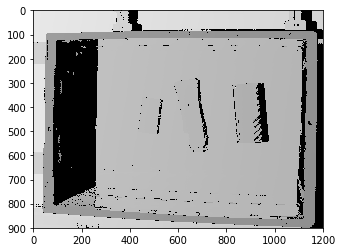

Processing 1 images
image                    shape: (900, 1200, 3)        min:    0.00000  max:  232.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -128.00000  max:  104.00000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1200.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


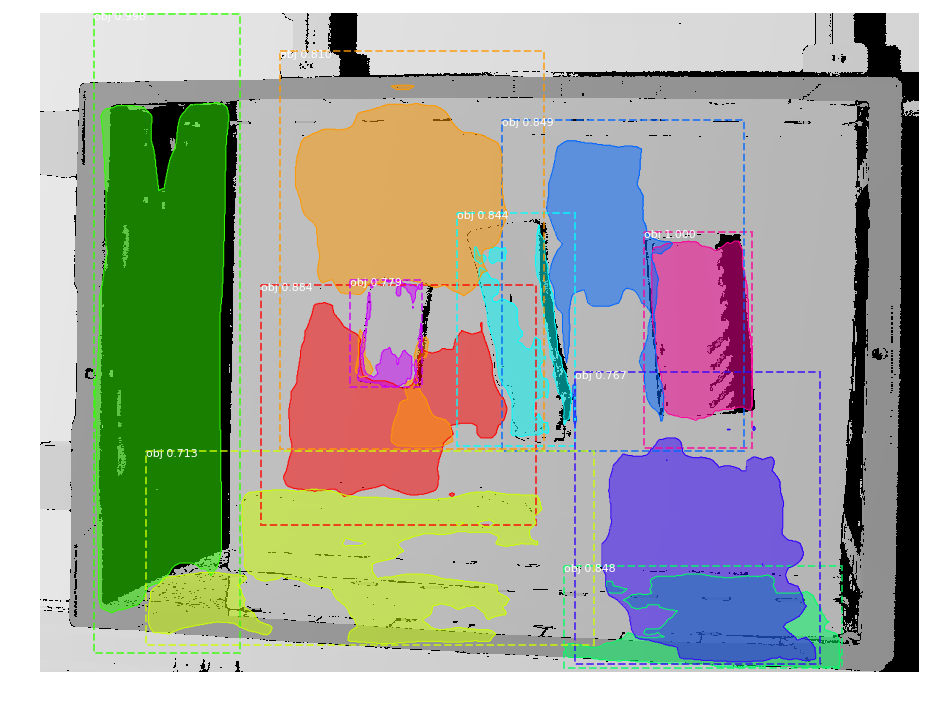

In [15]:
import cv2
depth = cv2.imread("./captured.png")
depth = depth[500:1400, 400:1600]
plt.imshow(depth)
plt.show()

results = model.detect([depth], verbose=1)
r = results[0]
visualize.display_instances(depth, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

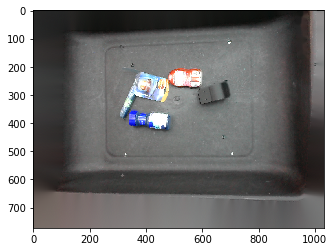

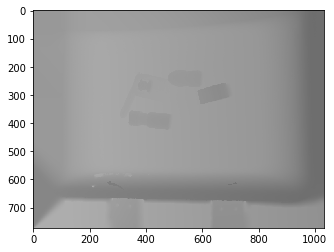

Processing 1 images
image                    shape: (772, 1032, 3)        min:  109.00000  max:  173.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -128.00000  max:   45.00000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1032.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


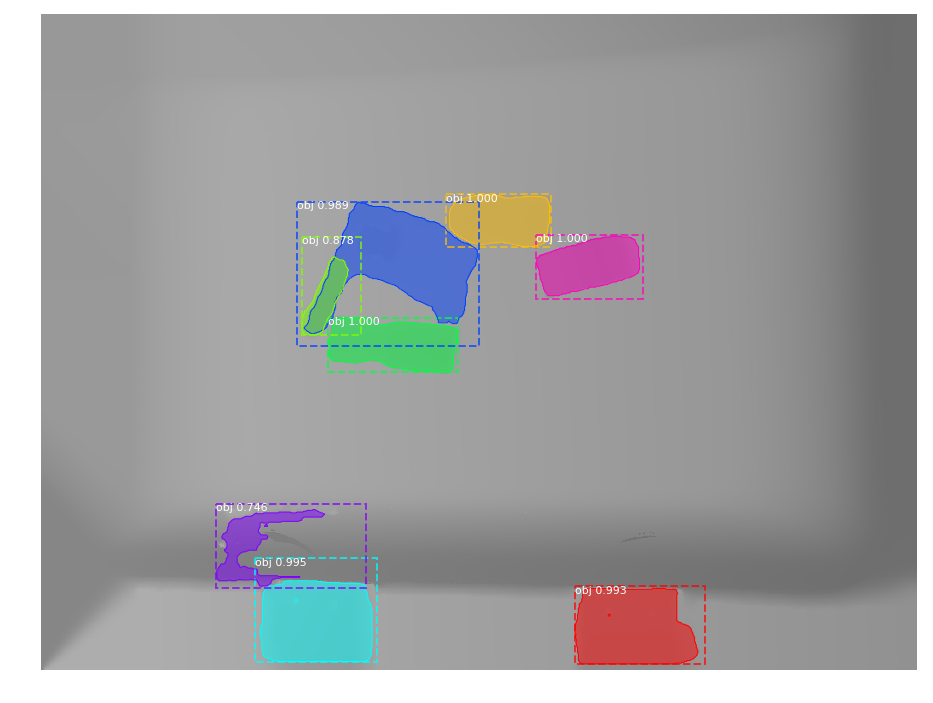

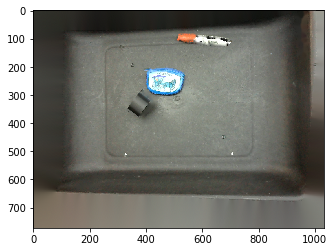

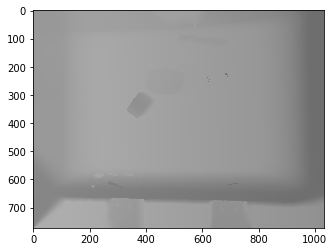

Processing 1 images
image                    shape: (772, 1032, 3)        min:  109.00000  max:  173.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -128.00000  max:   45.00000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1032.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


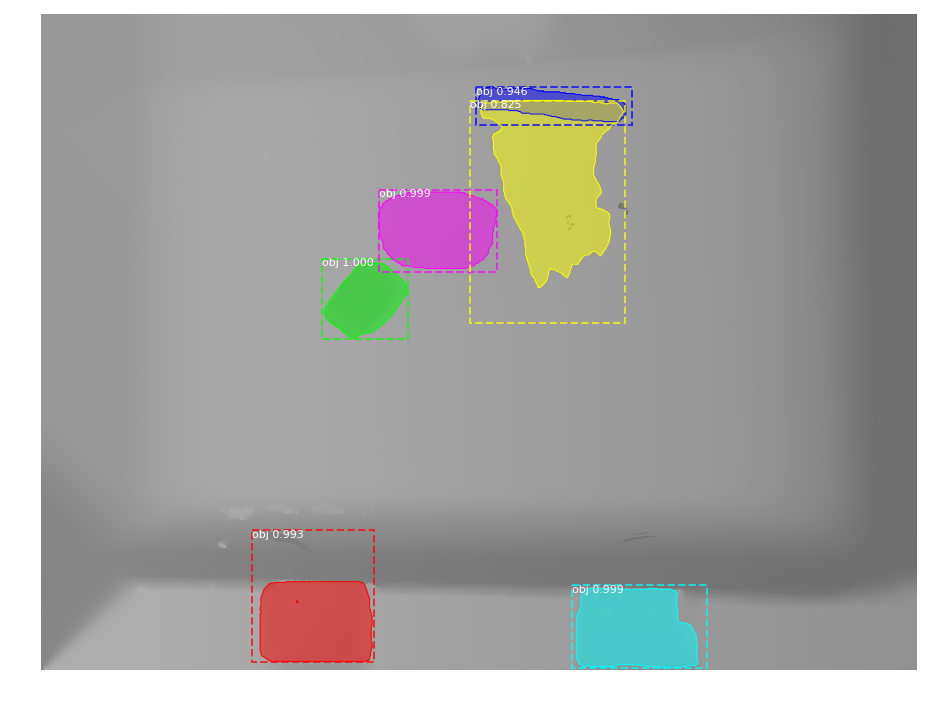

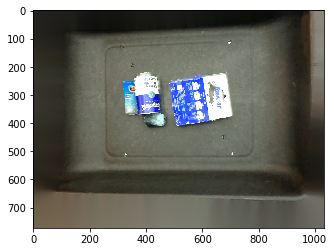

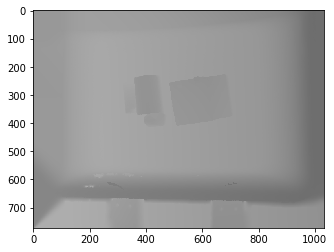

Processing 1 images
image                    shape: (772, 1032, 3)        min:  109.00000  max:  173.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -128.00000  max:   45.00000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1032.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


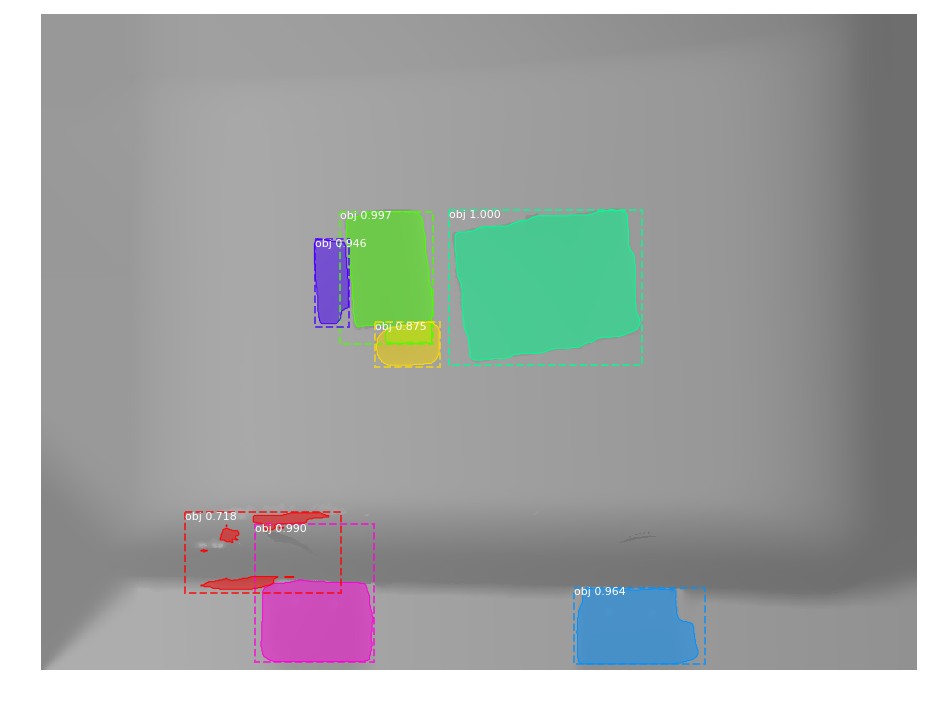

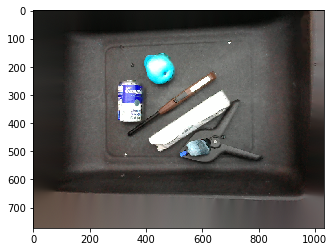

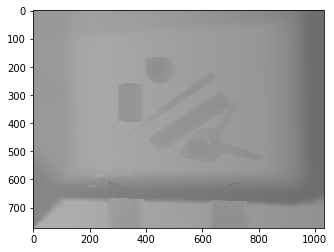

Processing 1 images
image                    shape: (772, 1032, 3)        min:  109.00000  max:  173.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -128.00000  max:   45.00000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1032.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


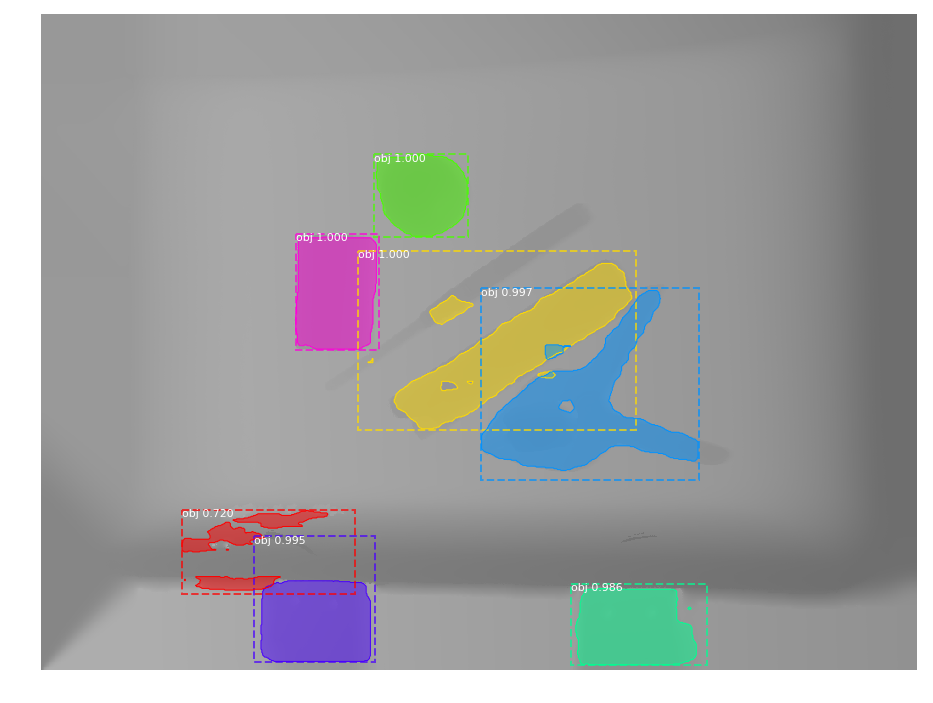

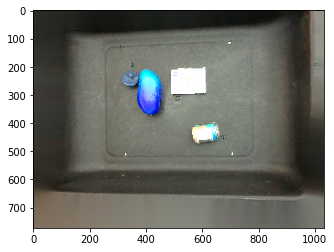

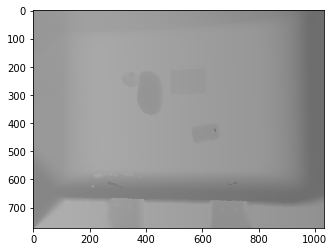

Processing 1 images
image                    shape: (772, 1032, 3)        min:  109.00000  max:  173.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -128.00000  max:   45.00000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1032.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


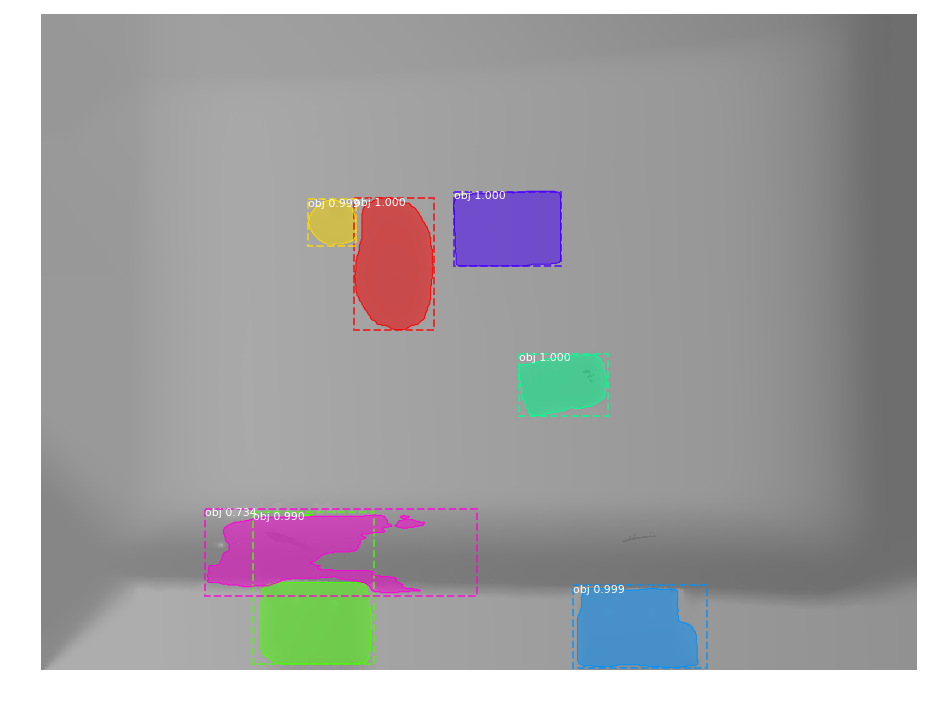

In [13]:
import os
import cv2

ROOT_DIR = os.path.abspath("./")
IMAGE_DIR = os.path.join(ROOT_DIR, "sd_maskrcnn/datasets/wisdom/wisdom-real/high-res/color_ims/")
DEPTH_DIR = os.path.join(ROOT_DIR, "sd_maskrcnn/datasets/wisdom/wisdom-real/high-res/depth_ims/")
image_files = os.listdir(IMAGE_DIR)
depth_files = os.listdir(DEPTH_DIR)

image_files.sort()
depth_files.sort()

for i in range(5):
    image = cv2.imread('./sd_maskrcnn/datasets/wisdom/wisdom-real/high-res/color_ims/' + image_files[i])
    depth = cv2.imread('./sd_maskrcnn/datasets/wisdom/wisdom-real/high-res/depth_ims/' + depth_files[i])
    
    plt.imshow(image)
    plt.show()
    plt.imshow(depth)
    plt.show()
    results = model.detect([depth], verbose=1)
    r = results[0]
    visualize.display_instances(depth, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])
    
# depth = cv2.imread("./test.png")
# image= cv2.imread('./sd_maskrcnn/datasets/wisdom/wisdom-real/high-res/color_ims/image_000130.png')
# depth= cv2.imread('./sd_maskrcnn/datasets/wisdom/wisdom-real/high-res/depth_ims/image_000130.png')
# plt.imshow(image)
# plt.show()
# plt.imshow(depth)
# plt.show()
# results = model.detect([depth], verbose=1)
# r = results[0]
# visualize.display_instances(depth, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])